# Agenda
- Vokabular
- Reichhaltigkeit
- Filtern nach Länge
- Frequency distribution
- Bigrams 
- Concordance
- Ähnlichkeit
- Dispersionsplot
- Wordcloud 2.0

In [1]:
import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Vokabular
- Wie groß ist das Vokabular von Moby Dick?

In [11]:
a = [1,2,3,3,5,4,5,5,5]
len(set(a))

5

In [20]:
len(set(text1))

19317

In [21]:
len(list(text1))

260819

### Aufgabe

- Das von Sense and Sensibility von Jane Austen?

In [38]:
len(set(text2))

6833

In [39]:
len(text2)

141576

- Und das Vokabular der Menschenrechtserklärung?

In [27]:
from nltk.corpus import udhr
nltk.download("punkt")
sample = (" ").join(udhr.words("German_Deutsch-Latin1"))
tokens = nltk.word_tokenize(sample)
menschenrechtserklaerungs_text = nltk.Text(tokens)
len(set(menschenrechtserklaerungs_text))
len(menschenrechtserklaerungs_text)

[nltk_data] Downloading package punkt to /Users/plotti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1522

# Reichhaltigkeit
- Welcher text ist am reichhaltigesten d.h. das größte Vokabular pro Text?
- Maximaler Quotient ist 1: 100 verschiedene wörter / 100 wörter insgesammt = 1

In [33]:
example_text = ["plotti", "plotti", "plotti","plotti","plotti"]
example_text2 = ["different", "words", "here"]

In [34]:
len(set(example_text)) / float(len(example_text))

0.2

In [35]:
len(set(example_text2)) / float(len(example_text2))

1.0

In [36]:
# Moby Dick
len(set(text1)) / float(len(text1))

0.07406285585022564

### Aufgabe

In [41]:
# Jane Austen
len(set(text3)) / float(len(text3))

0.06230453042623537

In [42]:
# Menschenrechtserklärung
len(set(menschenrechtserklaerungs_text)) / float(len(menschenrechtserklaerungs_text))

0.3797634691195795

# Filtern 
- nach Wörtern bestimmter länge

In [44]:
#V = set(text1)
#V

In [58]:
# Moby Dick
V = set(text2)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['companionableness',
 'disinterestedness',
 'disqualifications',
 'incomprehensible']

### Aufgabe

In [52]:
# Menschenrechtserklärung
# Was sind die längsten wörter dort? 
# dein code hier
V = set(menschenrechtserklaerungs_text)
long_words = [w for w in V if len(w) > 18]
sorted(long_words)

['Berufsschulunterricht',
 'Grundschulunterricht',
 'Hochschulunterricht',
 'Staatsangehörigkeit',
 'zusammenzuschließen']

## Filtern nach Länge und Frequenz

In [61]:
fdist1 = FreqDist(text2)
fdist1

FreqDist({',': 9397, 'to': 4063, '.': 3975, 'the': 3861, 'of': 3565, 'and': 3350, 'her': 2436, 'a': 2043, 'I': 2004, 'in': 1904, ...})

In [68]:
# Wörter die in Moby Dick mind. 12 buchstaben lang sind und mind. 8 mal vorkommen
fdist1 = FreqDist(text1)
sorted(w for w in set(text1) if len(w) > 14 and fdist1[w] > 3)

['apprehensiveness', 'notwithstanding', 'perpendicularly']

# Verteilung
- Welches Wort kommt in Moby Dick am häufigsten vor?
- Hier z.B. die Lyrics des Hits "Versace" von Migos: https://www.youtube.com/watch?v=rF-hq_CHNH0 :) 

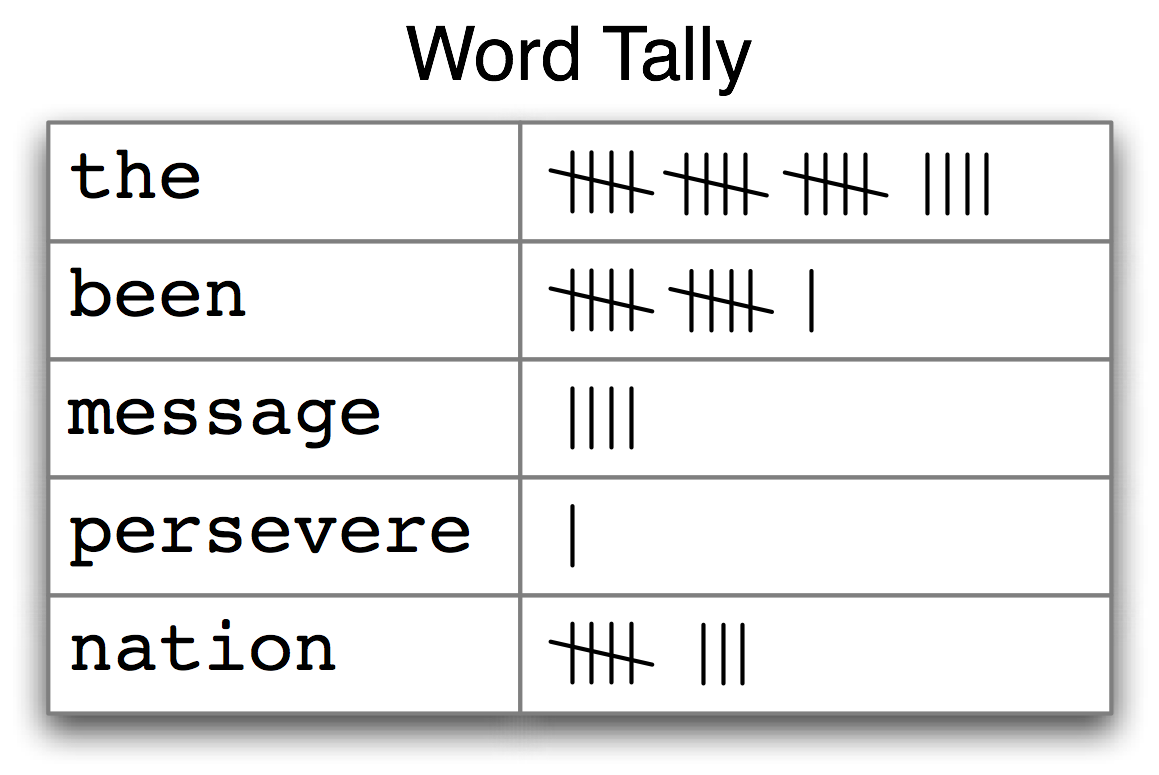

In [28]:
from IPython.display import Image
Image("frequency.png", width=300)

- Welche Wörter kommen am häufigsten bei Moby Dick vor?

In [69]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

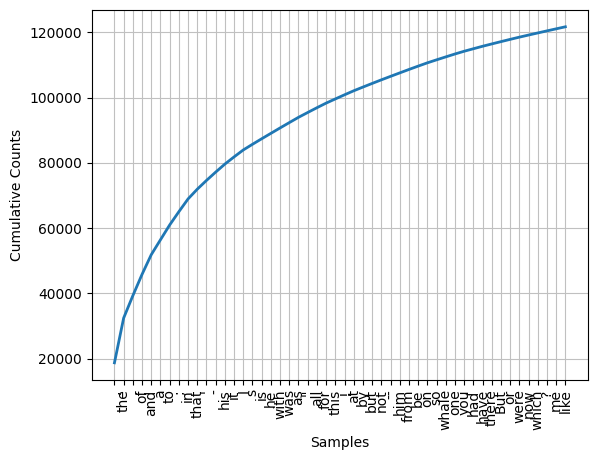

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [71]:
fdist.plot(50, cumulative=True)

- Jedes zusätzliche Wort kommt immer weniger oft vor (diminishing returns)
- Welches Wort kommt in meinem Satz am häufigsten vor?

In [74]:
sample = '''Ich war heute im Wald spazieren und sah ein Reh. Wobei ich ich nicht sicher war ob es ein Reh war oder ein Geist.'''
tokens = nltk.word_tokenize(sample)
text = nltk.Text(tokens)
#list(text)

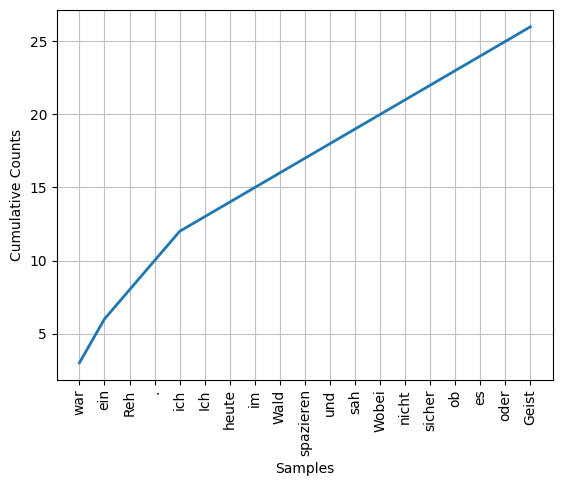

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [75]:
fdist = FreqDist(text)
fdist.plot(30, cumulative=True)

In [76]:
fdist

FreqDist({'war': 3, 'ein': 3, 'Reh': 2, '.': 2, 'ich': 2, 'Ich': 1, 'heute': 1, 'im': 1, 'Wald': 1, 'spazieren': 1, ...})

### Aufgabe
- Erzeugt eigenen Text oder kopiert ihn aus dem Internet und zählt welche Wörter am häufigsten vorkommen, sind die ersten 3 Positionen bei Euch ähnlich? Warum?

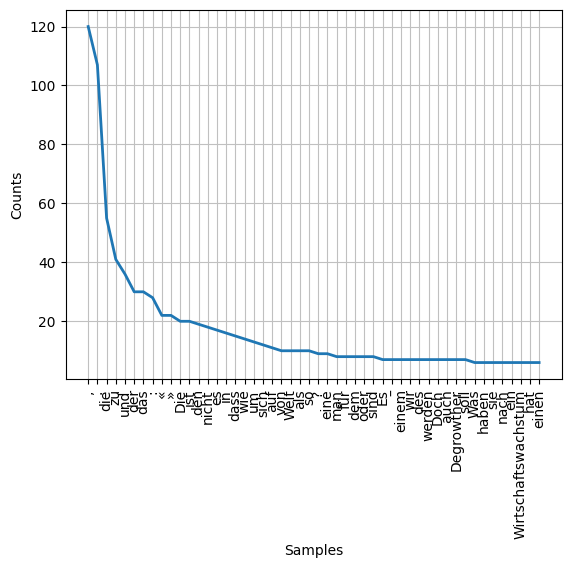

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [103]:
sample = '''Es könnte die Einleitung eines Monthy Python Sketches sein: In den letzten Tagen flogen Dutzende bis Hunderte Privatjets ins ägyptische Sharm el-Sheikh, um über Massnahmen gegen die Erderwärmung zu verhandeln.

Die Zwischenbilanz der Klimakonferenz: Ernüchternd. Wie jedes Jahr. Die Schlagzeilen: Pessimistisch. Wie jedes Jahr. «Schweiz nur teilweise zufrieden mit Verlauf von Klimakonferenz», schreibt etwa die SDA. «Langsame Fortschritte schüren Sorge um Abschlussvereinbarung», titelt Reuters. Zurecht könnte man sich fragen: Was bringen diese Konferenzen eigentlich?
Hier findest du weitere Schlagzeilen:
«Kompromiss», «Aufschub» «Minimalkonsens» – und der CO₂-Ausstoss wächst weiter und weiter

Einige Aushängeschilder der Klimastreik-Bewegung haben den Glauben an die Jet fliegenden Staatschefs bereits verloren. So erklärte Greta Thunberg Ende Oktober, dass sie nicht nach Ägypten reisen werde. Der Grund: Die Klimakonferenz sei ein «kolossaler Betrug». Sie sei lediglich «eine Gelegenheit für Politiker und Machthaber, um Aufmerksamkeit zu erregen.»

Die 19-jährige Klimaaktivistin rief zu einem Systemwandel auf, da die derzeitige Normalität der Welt die Klimakrise erst verursacht habe. Thunberg sagte: «Was wir als normal bezeichnen, ist ein extremes System, das auf der Ausbeutung von Menschen und des Planeten beruht.»

Die deutsche Klimaaktivistin Lisa Maria Neubauer haut in dieselbe Kerbe. «System Change not Climate Change» lautet das neue Motto der Bewegung. Es fordert nichts Geringeres, als vorhandene Machtstrukturen aufzubrechen, den Kapitalismus zu überwinden und das grenzenlose Wirtschaftswachstum zu beenden.

Bevor jetzt Hände über den Köpfen verworfen werden und einem das Totschlagargument «linksextrem» über die Lippen gleitet: Was heisst Systemwechsel überhaupt? Was wird hier gefordert und warum? Und nicht zuletzt: Gibt es tatsächlich keinen anderen Weg aus der Klimakrise?
Wer hat die Macht?

Machtstrukturen aufbrechen – klingt abenteuerlich. Stoff für einen Heldenfilm. Doch um Machtstrukturen aufbrechen zu können, muss erst das Wort «Machtstrukturen» an sich aufgebrochen werden. Was heisst Macht? Und von welchen Strukturen sprechen wir hier?

Die genaue Beantwortung dieser Frage würde den Rahmen dieses Artikels sprengen. Am Ende des Textes finden Interessierte eine Infobox mit einer Übersicht zu dem Thema. Für uns ist wichtig: Immer mehr Klimawissenschaftlerinnen und Ökonomen argumentieren, dass es keine Rolle spielt, wer die Macht hat oder aus welcher Partei die Staatschefs dieser Welt sind. SP oder SVP, Republikaner oder Demokraten, Bharatiya Janata oder Trinamool Congress – wachse die Wirtschaft nicht, bedeutete das Arbeitslosigkeit, Statusverlust, Existenzängste. Bis hin zur Obdachlosigkeit und dem Verhungern.

Oberstes Ziel jeder Regierung im Kapitalismus sei es dementsprechend, das Wirtschaftswachstum zu maximieren. Egal, wie grün man sich gebe. Doch die Wirtschaft könne nicht weiter wachsen, ohne die Menschheit in eine Klimakatastrophe zu stürzen. Die einzige Lösung: ein politischer Übergang. Vom Wirtschaftswachstum als oberste Priorität zur Akzeptanz eines schrumpfenden BIP als Voraussetzung für die Rettung des Planeten. Oder einfacher: eine Abkehr vom Kapitalismus, wie wir ihn heute kennen.
Degrowth, oder: weniger ist weniger

Die Volkswirtschaften dieser Welt sollen also schrumpfen. Bekannt ist diese Idee als «Degrowth» – lose übersetzt «Antiwachstum». Im deutschsprachigen Raum spricht man auch von «Postwachstum». Ihren Ursprung hatte die Idee in den 70er-Jahren.

Die Degrowther sind überzeugt, dass sich das Wirtschaftswachstum in der modernen Welt von der Verbesserung der menschlichen Lebensbedingungen abgekoppelt hat. Heisst: Technologische Fortschritte wie umweltfreundlichere Häuser oder Solarpanels würden nicht zur Reduktion des CO₂-Ausstosses verwendet, sondern dafür, bei gleichbleibendem CO₂-Ausstoss mehr produzieren zu können.

Um die Klimakrise zu bewältigen und ultimativ das Überleben unserer Spezies zu sichern, muss der CO₂-Verbrauch jedoch sinken. Also müsse dies Priorität haben, um jeden Preis, sagen die Degrowther. Emission müssen auf Null gebracht werden, auch wenn dies hiesse, dass die Wirtschaft schrumpft. In ihrem neuen Buch beschreibt Greta Thunberg das so:
«Wenn die Badewanne zu überlaufen droht, sucht man nicht nach Eimern, sondern dreht erst einmal den Wasserhahn ab.»
Greta Thunberg

Die Forderung Thunbergs ist auch im wissenschaftlichen Mainstream zu finden. Mehr als 26'000 Wissenschaftlerinnen unterzeichneten 2019 einen offenen Brief. Darin wird gefordert, dass die Menschheit die Erhaltung der Ökosysteme höher priorisieren solle als das Wirtschaftswachstum. Auch der IPCC verwies in einem kürzlich erschienen Bericht auf Degrowth. Mehrere Bücher von namhaften Anthropologen und Klimawissenschaftlern erschienen dazu in den vergangenen Jahren. Selbst der ehemalige US-Energieminister und Physikprofessor Steven Chu sagte:
«Man muss eine Wirtschaft entwerfen, die auf keinem Wachstum oder sogar auf einem schrumpfenden Wachstum basiert»
Ex-US-Energieminister Steven Chu
Wie soll das funktionieren?

Fragt sich bloss: Wie soll das funktionieren? Die Lösung besteht nach Ansicht der Degrowth-Bewegung darin, die Produktion unnötiger Güter einzuschränken und zu versuchen, die Nachfrage nach Dingen zu verringern, die nicht benötigt werden.

James Hickel, Anthropologe und führender Wissenschaftler im Bereich Degrowth, beschrieb dies so: «Wenn unsere Waschmaschinen, Kühlschränke und Telefone doppelt so lange halten würden, würden wir nur halb so viele davon verbrauchen. Aber unser Zugang zu diesen Gütern würde sich nicht verschlechtern.»
13 Grafiken zum Klimawandel, die jeder kennen sollte

Doch es geht nicht nur um Kühlschränke. Food Waste soll verringert, eine Tauschwirtschaft aufgebaut, private Transportmittel verboten werden. Letztlich soll das BIP schrumpfen, ohne Armut oder einen geringeren Lebensstandard zu verursachen.

«Wir schlagen Massnahmen wie einen existenzsichernden Lohn und Vermögenssteuern vor, um dies zu erreichen», sagte Hickel. «Länger haltbare Produkte, kürzere Arbeitswochen, besserer Zugang zu öffentlichen Dienstleistungen und bezahlbarem Wohnraum – wir fordern das Gegenteil von Armut. Ja, Industrien wie SUVs und Fast Fashion würden zurückgehen, aber das bedeutet nicht Armut. Wir können sie durch öffentliche Verkehrsmittel und langlebigere Mode ersetzen und so die Bedürfnisse aller erfüllen.»
Das Problem mit den Entwicklungsländern

Klingt toll. Doch es gibt ein Problem. Nein, viele Probleme. Erstens: Menschen, die gegen wirtschaftliches Wachstum argumentieren, sind meistens nicht diejenigen, die am meisten vom Wachstum in den nächsten Jahrzehnten profitieren würden.

Dass man im Westen Autos verbietet, die so gross sind wie eine Einzimmerwohnung, wäre ein Opfer, dass es sich wahrscheinlich zu erbringen lohnt, um das Klima zu retten. Aber die meisten Menschen dieser Welt sind nach wie vor arm. Einem Entwicklungsland zu empfehlen, es soll schrumpfen, weil die Industriestaaten den Planeten zerstört haben, um sich zu bereichern: Das ist, nun ja, etwas unfair.

Die Degrowther haben sich dies natürlich auch schon überlegt. Die Lösung für das Problem: Man trifft sich in der Mitte. Ärmere Länder könnten sich bis zu einem gewissen Punkt entwickeln, reichere Länder bis zum selben Punkt schrumpfen. «Wir leben auf einem Planeten, auf dem Ressourcen im Überfluss vorhanden sind und auf dem wir alle gemeinsam gedeihen können. Aber dazu müssen wir ihn gerechter teilen», sagte James Hickel.

Doch so einfach ist das nicht. In einer globalisierten Welt können reiche Staaten nicht einfach schrumpfen, während die armen wachsen. Was plötzliche Konsumstopps bewirken, hat man während der Coronapandemie gesehen. Entwicklungsländer litten unproportional mehr. Es gilt also auch hier der Grundsatz: Die Armen trifft es immer am stärksten.

Zudem: So unvollkommen wie das Bruttoinlandsprodukt auch sein, man kann nicht leugnen, dass ein höheres BIP gleichbedeutend ist mit einem besseren Leben. Reiche Länder stehen in fast allen Metriken besser da. Von Bildung, Lebenserwartung, allgemeine Gesundheit und Kindersterblichkeit bis zur Beschäftigung von Frauen.

Degrowther wollen verhindern, dass eine Schrumpfkur den Entwicklungsländern schadet, indem sie gleichzeitig für wirtschaftliche Gerechtigkeit kämpfen – ungleiche Handelsbeziehungen beenden, einheimische Industrien fördern. Wie genau das jedoch funktionieren soll, dazu gibt es noch kein Patentrezept. Das sorgt für Kritik: «Die Degrowther leben in einer Fantasiewelt. Sie gehen davon aus, dass wenn man einen kleineren Kuchen backt, die Ärmsten aus irgendeinem Grund einen grösseren Anteil davon bekommen», sagte Per Espen Stoknes, Direktor des Center for Green Growth an der Norwegian Business School. «Das ist noch nie passiert.»
Degrowth ist so unrealistisch wie Green Growth es ist

Das politische Gegenstück zur Degrowth-Bewegung ist die Green-Growth-Bewegung. Also das grüne Wachstum. Ein Weg, den die meisten Regierungen dieser Welt einschlagen, um den Klimawandel zu bekämpfen. Dabei soll das Wirtschaftswachstum vom CO₂-Ausstoss entkoppelt werden.

Tatsächlich ist es bereits 23 Ländern gelungen, ihr BIP-Wachstum von den Treibhausgasemissionen zu entkoppeln. Dafür wurden Kohlekraftwerke stillgelegt, Fabriken gezwungen, effizienter zu arbeiten, und Windturbinen und Sonnenkollektoren gebaut, die sauberen Strom erzeugen.

Doch das ist bei Weitem nicht genug. 2021 wurde so viel CO₂ ausgestossen wie nie zuvor. Auch die bisherigen Anstrengungen der Weltgemeinschaft, die Erderwärmung auf 1,5 Grad zu drosseln, sind ungenügend. Um das Ziel dennoch zu erreichen, ist eine grosse Portion Optimismus vonnöten.

Hier liegt auch das Problem der Degrowther. Denn wie die Vox-Journalistin Kelsey Piper analysierte, sind die Vorschläge der Green Growther immer noch um einiges realistischer als diejenigen der Degrowther.

Die Degrowth-Bewegung vermag es ausserordentlich gut, die Schwächen, Probleme und Ungerechtigkeiten des jetzigen Systems aufzuzeigen. Sie hat recht, wenn sie sagt, dass es sehr, sehr kompliziert sein wird, die Menschheit und unseren Planeten durch das 21. Jahrhundert zu manövrieren. Und es ist angebracht, skeptisch über die Erfolgsaussichten der momentan verhandelten Massnahmen zu sein. Geht es jedoch um die Herkulesaufgabe, Wohlstand und Lebensstandard zu entkoppeln und dabei noch die Klimaerwärmung zu beenden, wird sie seltsam optimistisch. Ganz zu schweigen davon, dass die vorgeschlagenen Massnahmen der Bewegung fast schon lächerlich unzureichend erscheinen.
Kohle- und Ölkonzerne an Klimakonferenz – dank Einladung aus dem Kreml

Die COP27 in Sharm el-Sheikh kann kritisiert werden. Dafür, dass viele der teilnehmenden Staatschefs den Ernst der Lage nach wie vor nicht erkannt haben. Dafür, dass grosse Firmen wie Amazon den Auftritt für Greenwashing missbrauchen. Dafür, dass der Klimawandel in der Mainstream-Wirtschaftspolitik immer noch viel zu wenig Beachtung findet.

Denn die Realität ist: Es bleibt nicht mehr viel Zeit, um das Ruder herumzureissen. Der CO₂-Ausstoss muss jetzt sinken. Es braucht massive Investitionen in grüne Energie, nachhaltige Landwirtschaft und Naturschutz. Es braucht Dekarbonisierung und Transferzahlungen an arme Länder, die unverhältnismässig stark unter dem Klimawandel leiden. Und ja, es braucht all das schneller, als es momentan umgesetzt wird.

Die Klimakonferenz deswegen aber zu boykottieren und als kolossalen Betrug zu bezeichnen, ist falsch. Das untergräbt die Tausenden von Klimawissenschaftlern und Organisationen, die sich dem Kampf gegen den Klimawandel verschrieben haben und vor Ort für Lösungen kämpfen.

Die Degrowth-Bewegung liefert hierfür wertvolle Denkanstösse: Fast Fashion hat wahrscheinlich keinen Platz in einer nachhaltigen Welt, genauso wenig wie SUVs. Es ist elementar, dass die grüne Energierevolution nicht die bestehenden Muster der Ausbeutung und des übermässigen Ressourcenabbaus im Globalen Süden wiederholt. Die Regierungen dieser Welt sollten zudem die zur Verfügung stehenden Ressourcen in ihre BIP-Berechnung einbeziehen (lies dazu: Material Productivity).

Doch zu glauben, in dem kurzen Zeitfenster, das uns noch bleibt, die gesamte Welt auf den Kopf zu stellen und sie so zu retten, ist nur eines: naiv.

'''
tokens = nltk.word_tokenize(sample)
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(50, cumulative=False)

# Bigrams
- Welche Wörter kommen häufig zusammen vor?
- Böhmerman hatte vor ein paar Jahren aus den häufigsten Phrasen einen Popsong gemacht https://www.youtube.com/watch?v=h8MVXC_hqNY

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [86]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [87]:
menschenrechtserklaerungs_text.collocations()

das Recht; Jeder hat; hat das; Niemand darf; Recht auf; Anspruch auf;
Vereinten Nationen; dem Gesetz; auf Grund; Alle Menschen; strafbaren
Handlung; auf gleichen; Allgemeine Erklärung; wegen einer; gegen jede;
der Menschenrechte; notwendig ist; des Landes; diese Erklärung; hat
Anspruch


### Aufgabe
- Welche Bigramms kommen am häufigsten bei einem beliebigen Text von 20min.ch vor?

In [88]:
with open('graeber.txt') as f:
    lines = f.readlines()
utopia = " ".join(lines)

In [92]:
#tokens = nltk.word_tokenize(utopia)
#text = nltk.Text(tokens)
text.collocations()

dieser Welt; Greta Thunberg; Fast Fashion; Sharm el-Sheikh; Steven
Chu; jedes Jahr; Green Growth; James Hickel; das Wirtschaftswachstum;
Machtstrukturen aufbrechen; Wie jedes; soll das; Regierungen dieser;
wir ihn; die Menschheit; immer noch; wie SUVs; den
Entwicklungsländern; Die Degrowther; die Wirtschaft


### Advanced Trigrams

- Bigramme mit Frequenz in der Menschenrechtserklärung

In [96]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(text1)
finder.apply_freq_filter(10) # reduce to trigrams that appeared at least 10 times
finder.nbest(trigram_measures.pmi, 10) 

[('There', 'she', 'blows'),
 ('Dough', '-', 'Boy'),
 ('o', "'", 'clock'),
 ('Town', '-', 'Ho'),
 ('Loose', '-', 'Fish'),
 ('Fast', '-', 'Fish'),
 ('Mrs', '.', 'Hussey'),
 ('King', '-', 'Post'),
 ('try', '-', 'works'),
 ('Fish', '?', 'What')]

- Trigramme in der Menschenrechtserklärung
- mehr Beispiele unter http://www.nltk.org/howto/collocations.html

In [97]:
finder = TrigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(3) # reduce to bigrams that appeared at least 3 times
finder.nbest(trigram_measures.pmi, 10)

[('hat', 'das', 'Recht'),
 ('Jeder', 'hat', 'das'),
 ('.', 'Niemand', 'darf'),
 ('das', 'Recht', 'auf'),
 ('hat', 'Anspruch', 'auf'),
 ('Jeder', 'hat', 'Anspruch'),
 ('werden', '.', 'Artikel'),
 ('.', 'Jeder', 'hat'),
 (',', 'da', 'die'),
 ('das', 'Recht', ',')]

# Übereinstimmungen oder Konkordanz

- In welchem Kontext steht überall "monstrous" im Text bei Moby Dick?

In [99]:
text1.concordance("gladly")

Displaying 4 of 4 matches:
reater sinner than ye . And now how gladly would I come down from this mast - 
at we were bosom friends ; he would gladly die for me , if need should be . In
egged him to go on and tell it . He gladly complied . Though at the time I but
 let me charter your ship -- I will gladly pay for it , and roundly pay for it


In [100]:
text2.concordance("gladly")

Displaying 3 of 3 matches:
of mind in the comparison , and how gladly she would engage in the solicitude 
lued , a precious trust to me ; and gladly would I have discharged it in the s
 " I would suppose him ,-- Oh , how gladly would I suppose him , only fickle ,


- In welchem Kontext kommen Menschenrechte in der Menschenrechtserklärung vor?

In [105]:
text.concordance("Welt")

Displaying 10 of 10 matches:
f , da die derzeitige Normalität der Welt die Klimakrise erst verursacht habe 
elcher Partei die Staatschefs dieser Welt sind . SP oder SVP , Republikaner od
weniger Die Volkswirtschaften dieser Welt sollen also schrumpfen . Bekannt ist
 Wirtschaftswachstum in der modernen Welt von der Verbesserung der menschliche
n . Aber die meisten Menschen dieser Welt sind nach wie vor arm . Einem Entwic
 das nicht . In einer globalisierten Welt können reiche Staaten nicht einfach 
, den die meisten Regierungen dieser Welt einschlagen , um den Klimawandel zu 
h keinen Platz in einer nachhaltigen Welt , genauso wenig wie SUVs . Es ist el
 wiederholt . Die Regierungen dieser Welt sollten zudem die zur Verfügung steh
 , das uns noch bleibt , die gesamte Welt auf den Kopf zu stellen und sie so z


In [101]:
menschenrechtserklaerungs_text.concordance("Recht")

Displaying 25 of 28 matches:
kt ist ist . Artikel 3 Jeder hat das Recht auf Leben , Freiheit und Sicherheit 
fen werden . Artikel 6 Jeder hat das Recht , überall als rechtsfähig anerkannt 
 Handlung beschuldigt wird , hat das Recht , als unschuldig zu gelten , solange
nnerstaatlichem oder internationalem Recht nicht strafbar war . Ebenso darf kei
htigungen . Artikel 13 Jeder hat das Recht , sich innerhalb eines Staates frei 
tsort frei zu wählen . Jeder hat das Recht , jedes Land , einschließlich seines
kzukehren . Artikel 14 Jeder hat das Recht , in anderen Ländern vor Verfolgung 
l zu suchen und zu genießen . Dieses Recht kann nicht in Anspruch genommen werd
verstoßen . Artikel 15 Jeder hat das Recht auf eine Staatsangehörigkeit . Niema
igkeit willkürlich entzogen noch das Recht versagt werden , seine Staatsanghöri
sangehörigkeit oder der Religion das Recht zu heiraten und eine Familie zu grün
und Staat . Artikel 17 Jeder hat das Recht , sowohl allein als auch in Gemeinsc
bt werden .

## Ähnlichkeit: Welche Wörter benutzen den gleichen Kontext?
- Bei Moby Dick?

In [106]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


- Bei Jane Austen?

In [107]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


- In der Menschenrechtserkläreung?

In [108]:
menschenrechtserklaerungs_text.similar("Recht")

## Dispersionsplot
- Welche Wörter kommen wann gemeinsam vor?

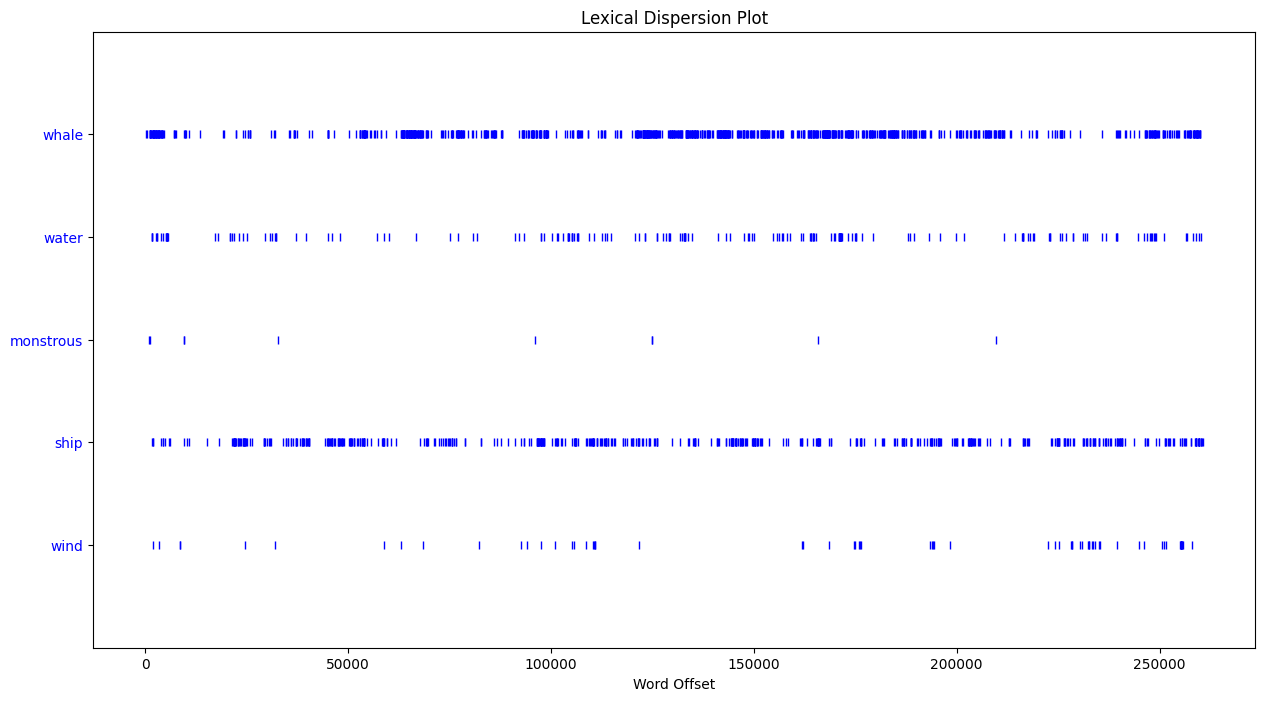

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
text1.dispersion_plot(["whale", "water", "monstrous", "ship", "wind"]) #, 

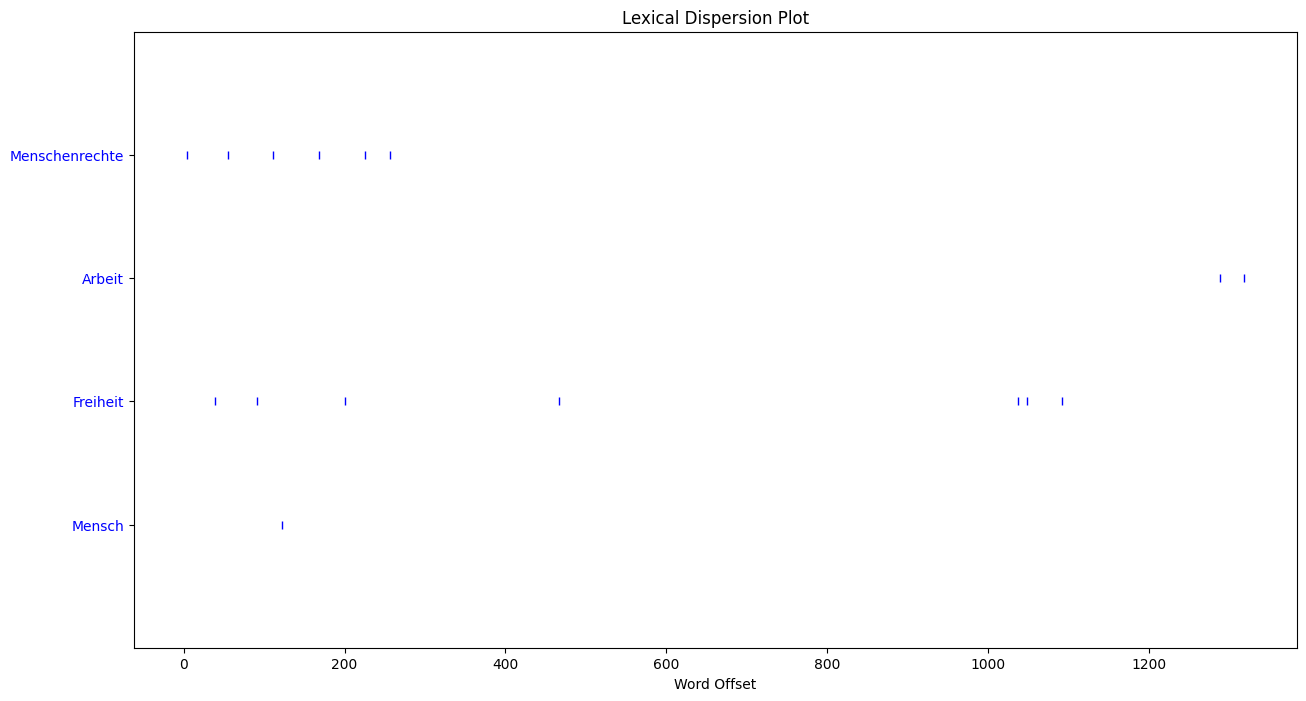

In [110]:
plt.figure(figsize=(15,8))
menschenrechtserklaerungs_text.dispersion_plot(["Menschenrechte", "Arbeit", "Freiheit", "Mensch"])

## Aufgabe:
- Probiert es mal mit einem Dispersionsplot für einen Text eurer Wahl. 

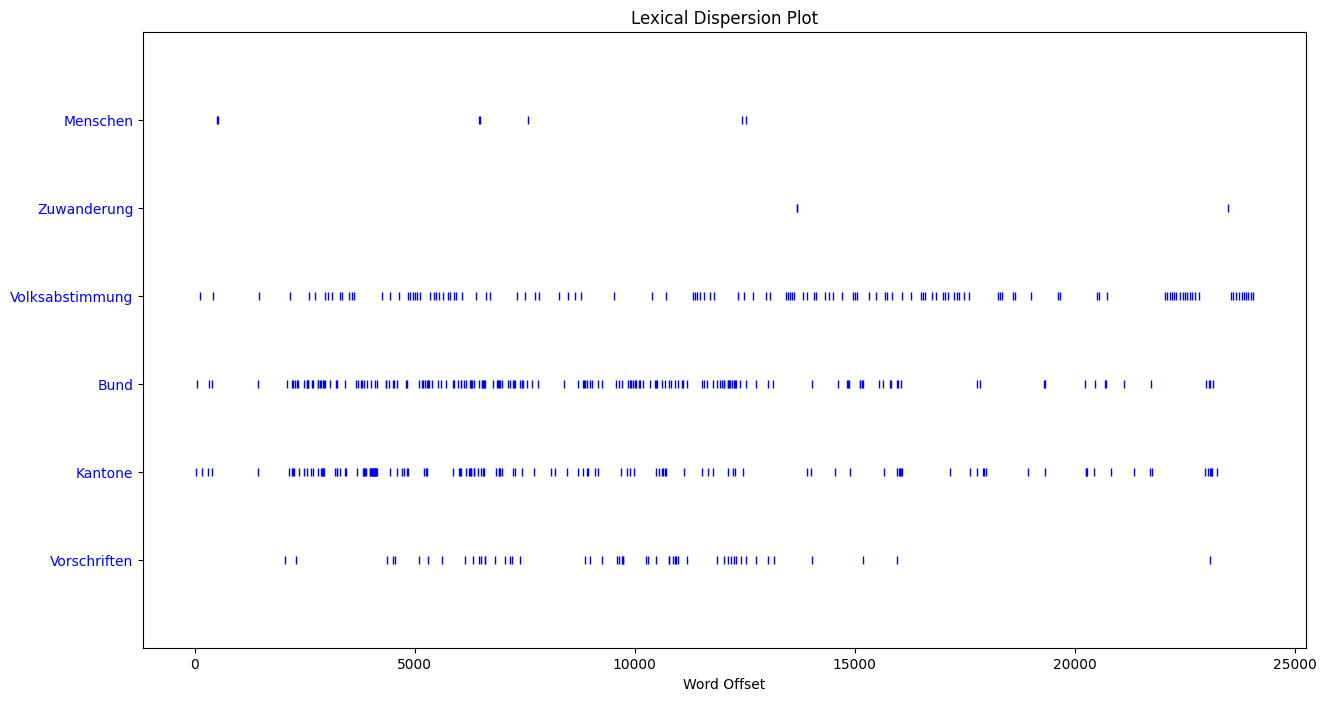

In [111]:
with open('swiss.txt', 'r') as file:
    verfassung = file.read().replace('\n', '')
tokens = nltk.word_tokenize(verfassung)
verfassung_text = nltk.Text(tokens)
plt.figure(figsize=(15,8))
verfassung_text.dispersion_plot(["Menschen", "Zuwanderung", "Volksabstimmung", "Bund", "Kantone", "Vorschriften"])

In [18]:
#!python -m spacy download de_core_news_sm

In [28]:
sp_pro = """
Ja zur Massentierhaltungs-Initiative

Die industrielle Tierproduktion nimmt auch in der Schweiz laufend zu. Tiere in der Landwirtschaft wie Kühe, Hühner oder Schweine sind bis heute ungenügend geschützt. Trotz ihrer Leidensfähigkeit werden sie zum Produkt herabgewürdigt, als Ware gemästet und in grossen Beständen auf kleinem Raum gehalten. Hochleistungszucht, Produktivitätssteigerung und der Trend zu Massentierhaltung sind keine zukunftsgerichteten Lösungen, im Gegenteil:

    Sie verursachen massives Leid und Gesundheitsprobleme für die Tiere und gefährden die Nachhaltigkeitsziele der Schweiz.
    Die industrielle Tierproduktion führt zu einem erhöhten Einsatz von Medikamenten und damit zu einer zunehmenden Antibiotikaresistenz.
    Die Massentierhaltung fördert das Risiko weiterer Pandemien, und die durch massive Futtermittelimporte vergrösserten Tierbestände belasten mit Stickstoff die Gewässer und weitere empfindliche Ökosysteme.

 

Forderungen der Massentierhaltungsinitiative

Die Initiative will in der Schweiz den Trend zu industrieller Massentierhaltung brechen. Sie verankert erstmals die Tierwürde in der Landwirtschaft, fordert eine tierfreundliche Unterbringung und Pflege, Auslauf ins Freie, maximale Gruppengrössen sowie eine schonende Schlachtung. Weiter sorgt eine Importvorschrift dafür, dass keine Tiere und Tierprodukte aus in der Schweiz verbotenen Produktionsmethoden eingeführt werden.

Gemäss Bundesrat wären nur rund 5 Prozent der landwirtschaftlichen Betriebe von der Initiative betroffen. Dazu gehören Mastbetriebe, die zurzeit bis zu 27’000 Hühner, 1'500 Schweine oder 300 Rinder in einem Stall halten.

Wer steht hinter der Initiative?

Die vom Verein Sentience Politics initiierte Initiative wird von verschiedenen Tier- und Umweltschutzorganisationen unterstützt. Zur Trägerschaft der Initiative gehören unter anderem die Tierschutzorganisation «Vier Pfoten», die Fondation Franz Weber und Greenpeace Schweiz. Eine breite Allianz aus Tierschutz-, Tierrechts-, Landwirtschafts- und Umweltorganisationen unterstützt das Anliegen. Dazu gehören beispielsweise KAGfreiland, Demeter, Tier im Recht und Pro Natura. Auch Bio Suisse und die Grünen haben die Ja-Parole beschlossen.

Der Bauernverband und die Agrarlobby wollen keine weiteren Auflagen und bekämpfen die Initiative.

Für uns ist klar: Es braucht eine Stärkung des Tierwohls. Gleichzeitig muss die Landwirtschaft umwelt- und klimaschonender werden. Die SP setzt sich für eine bäuerlich geprägte und vielfältige Landwirtschaft ohne Massentierhaltung ein.

Darum empfiehlt SP Schweiz ein Ja zur Massentierhaltungs-Initiative.
"""

svp_nein = """ Volksinitiative «Abschaffung der Massentierhaltung»

Eine Gruppe mit dem Namen Sentience Politics lancierte die nationale Volksinitiative «Zur Abschaffung der Massentierhaltung» in der Schweiz. Der genaue Initiativtext ist hier zu finden. Er beauftragt den Bund «die Würde des Tieres in der landwirtschaftlichen Tierhaltung» zu schützen. Als Massentierhaltung bezeichnen die Initianten alle Formen der landwirtschaftlichen Tierhaltung, bei denen das Tierwohl aus Wirtschaftlichkeitsgründen systematisch verletzt wird. Für die Initianten ist das «die Haltung von Tiere in grossen Gruppen auf engem Raum». In den vorgeschlagenen Übergangsbestimmungen geben sie als Richtwert den Standard von Bio Suisse an. Damit würden sich die Tierbestände z. B. von aktuell maximal 18‘000 Legehennen auf maximal 4000 pro Betrieb (2 Ställe à je 2000 Tiere) reduzieren.

Aus Sicht des SBV ist die Initiative unnötig: Die Schweizer Tierhaltung hat verglichen mit jener in anderen Teilen der Welt kleine Dimensionen. Unsere Tierschutzbestimmungen gehören zu den strengsten überhaupt. Regelungen zu den Höchstbeständen verhindern eine industrielle Massentierhaltung. Bei den Legehennen sind z.B. maximal 18‘000 erwachsene Tiere erlaubt, bei den Mastschweinen max. 1500 Mastschweine. Zum Vergleich: In Deutschland gibt es Betriebe mit 600‘000 Hühnern. Wenn Betriebe noch höchstens 4000 Legehennen halten dürften, würde das die einheimische Produktion markant verteuern. Weil nicht alle Konsumenten bereit sind, mehr zu bezahlen, würden die inländische Produktion zurückgehen und die Importe aus Staaten mit einem tieferen Standard zunehmen.

Zwar sieht die Initiative vor, dass der Bund auch Vorschriften über den Import erlässt, die der Initiative Rechnung tragen. Es ist aber davon auszugehen, dass sich solche Vorgaben beim Import von Lebensmitteln nicht mit unseren Verpflichtungen bei der WTO vereinbaren lassen. Bei der Umsetzung bei verarbeiteten Produkten wollen die Initianten selber ein «pragmatisches» Vorgehen. Konkret heisst das wohl, bei tierischen Inhaltsstoffen in importierten Lebensmitteln «weggeschaut würde». So könnten weiterhin Lebensmittel in die Schweiz gelangen, die z.B. Eiern aus Batteriehaltung enthalten. Eine Produktionsform, die in der Schweiz seit langem verboten ist. Bereits heute können die Konsumenten die Produktion beeinflussen, indem sie konsequent entsprechende Produkte, z.B. aus biologischer Produktion oder KAG-Freilandhaltung kaufen. Das Angebot folgt automatisch der Nachfrage."""

df = pd.DataFrame([{"partei":"svp","text":svp_nein},{"partei":"sp","text":sp_pro}])

In [29]:
df

,partei,text
0,svp,Volksinitiative «Abschaffung der Massentierha...
1,sp,\nJa zur Massentierhaltungs-Initiative\n\nDie ...


In [30]:

import spacy
import scattertext as st

nlp = spacy.load("de_core_news_sm")
corpus = st.CorpusFromPandas(df,
                             category_col='partei',
                             text_col='text',
                             nlp=nlp).build()

In [32]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['massentierhaltung', 'betriebe', 'initianten', 'legehennen', 'landwirtschaftlichen', 'tierhaltung', 'volksinitiative', 'abschaffung', 'lebensmitteln', 'tierproduktion']


In [37]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['svp Score'] = corpus.get_scaled_f_scores('svp')
print(list(term_freq_df.sort_values(by='svp Score', ascending=False).index[:10]))

['bei', 'produktion', 'z.b.', 'tierhaltung', 'maximal', 'legehennen', 'die initianten', 'würde', 'initianten', 'den']


In [38]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['sp Score'] = corpus.get_scaled_f_scores('sp')
print(list(term_freq_df.sort_values(by='sp Score', ascending=False).index[:10]))

['landwirtschaft', 'und', 'keine', 'werden', 'und die', 'zur', 'gehören', 'der initiative', 'für', 'initiative']
